In [1]:
#import your libraries
import pandas as pd
print("Pandas")
import numpy as np
print("Numpy")
import seaborn as sns
print("Seaborn")
import matplotlib as mpl
import matplotlib.pyplot as plt
print("MatPlotLib")
print("Libraries In!")

Pandas
Numpy
Seaborn
MatPlotLib
Libraries In!


In [3]:
#read your data and pull the column names 
df=pd.read_csv('titanicdata.csv')
for col in df.columns: 
    print(col) 

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [4]:
#choose the columns I want for this visualization
df1 = df[['Survived','Pclass','Sex','Age']]
df1

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [5]:
#Remove records without an age
df1.dropna()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


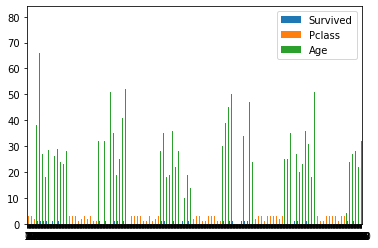

In [6]:
#run a bar chart
ax = df1.plot.bar(rot=0)

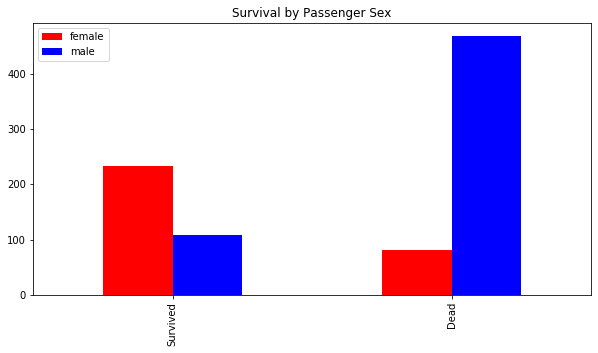

In [7]:
#that chart is ugly. let's clean it up. 
data=df1
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(10,5), color=['red','blue'], title='Survival by Passenger Sex')

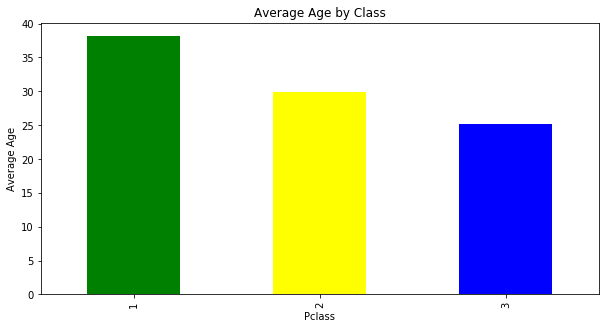

In [9]:
data=df1
ax = plt.subplot()
ax.set_ylabel('Average Age')
data.groupby('Pclass').mean()['Age'].plot(
                                           title = 'Average Age by Class',
                                           kind='bar',
                                           figsize=(10,5), 
                                           ax = ax,
                                           x = 'Passenger Class',
                                           color=['green', 'yellow', 'blue'])

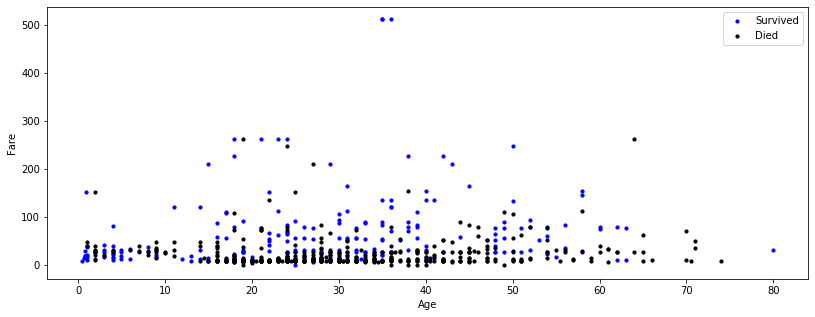

In [10]:
df=pd.read_csv('titanicdata.csv')
data=df
plt.figure(figsize=(30,5))
plt.title('Scatter Diagram of Survival By Age & Fare')
ax = plt.subplot(1,2,1)
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='blue',s=10)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='black',s=10)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','Died'),scatterpoints=1,loc='upper right',fontsize=10,)

Text(0.8, 0.95, 'Mr. Thomas Drake Martinez Cardeza')

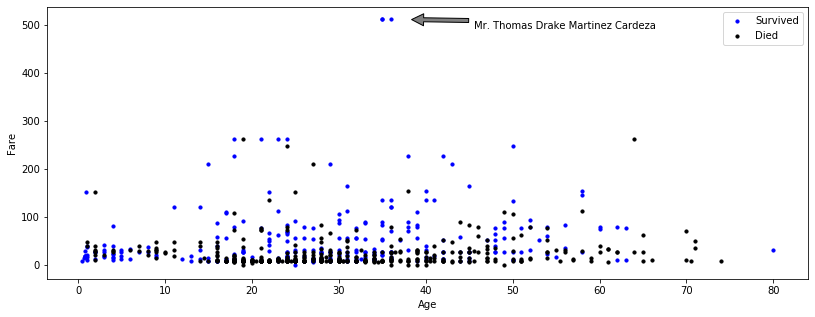

In [11]:
df=pd.read_csv('titanicdata.csv')
data=df
plt.figure(figsize=(30,5))
plt.title('Scatter Diagram of Survival By Age & Fare')
ax = plt.subplot(1,2,1)
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='blue',s=10)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='black',s=10)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','Died'),scatterpoints=1,loc='upper right',fontsize=10,)

ax.annotate('Mr. Thomas Drake Martinez Cardeza', xy=(38,512),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )


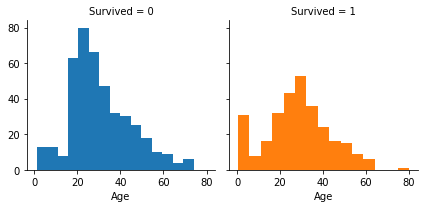

In [12]:
age_hist = sns.FacetGrid(df, col='Survived', hue='Survived')
age_hist.map(plt.hist, 'Age', bins=15)

WordCloud in!
file read


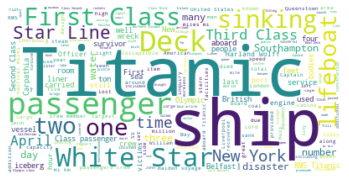

In [13]:
from wordcloud import WordCloud, STOPWORDS
print('WordCloud in!')
titanic_info=open('titanic.txt', 'r').read()
print('file read')
stopwords=set(STOPWORDS)
titanic_wc=WordCloud(background_color='white', stopwords=stopwords)
titanic_wc.generate(titanic_info)
plt.imshow(titanic_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
import folium
from folium import plugins
import pandas as pd
%matplotlib inline

In [16]:
coordinates = [
    [50.892239,-1.3981697],
    [49.646042,-1.618031],
    [51.853955,-8.2997997],
    [41.726931,-49.948253]
]

titanic_map = folium.Map(location=[48, -25], zoom_start=4)
my_PolyLine=folium.PolyLine(locations=coordinates,weight=5)
titanic_map.add_child(my_PolyLine)

#add markers
folium.Marker([50.892239,-1.3981697], popup='Southampton<br><i>April 10, 1912</i>').add_to(titanic_map)
folium.Marker([49.646042,-1.618031], popup='Cherbuorg<br><i>April 10, 1912</i>').add_to(titanic_map)
folium.Marker([51.853955,-8.2997997], popup='Queenstown<br><i>April 11, 1912</i>').add_to(titanic_map)
folium.Marker(location=[41.726931,-49.948253], popup='Titanic Wreck Site<br><i>April 15, 1912</i>'\
              ,icon=folium.Icon(color='blue')).add_to(titanic_map)

titanic_map